In [1]:
import time
import awa_interface
from observations.emittance import Emittance
from xopt.bayesian.algorithms import bayesian_exploration

import logging

logging.basicConfig(level=logging.DEBUG)


class Evaluator:
    def __init__(self, interface):
        self.interface = interface

    def evaluate_emittance(self, inputs):
        self.interface.set_parameters(inputs)

        time.sleep(1.0)

        observation = Emittance(self.interface,
                                50e-3 / 1158,
                                0.002,
                                2.5,
                                n_samples=5,
                                average_measurements=True,
                                n_required_blobs=10)

        results = observation.measure_emittance(min_size=100, min_intensity=20.0, verbose=False)
        pop_args = ['ellipses', 'processed_images', 'raw_images']
        for ele in pop_args:
            results.pop(ele)
        return results


In [2]:
VOCS = {
    'name': 'AWA_Exp',

    'variables': {
        #'Drive:Ctrl:DS1': [6.05, 9.07],  # Focusing Solenoid
        #'Drive:Ctrl:DS3': [0.0, 2.5],  # Matching Solenoid
        #'SMCtrl:AWA:abs03': [-640, 640],  # Linac Phase
        'AWA:Bira3Ctrl:Ch03': [-0.5, 0.5],  # DQ4
        'AWA:Bira3Ctrl:Ch04': [-0.5, 0.5],  # DQ5
        'AWA:Bira3Ctrl:Ch05': [-0.5, 0.5],  # DQ6

    },

    'objectives': {
        'EMITY': None,
    },

    'constraints': {
        'rms_x': ['LESS_THAN', 50],
        #'rms_y': ['LESS_THAN', 300],
        'total_intensity': ['GREATER_THAN', 250],
        #'centroid_offset': ['LESS_THAN', 100],
        'n_blobs': ['GREATER_THAN', 10]

    },
    'constants': {}

}

awa_interface = awa_interface.AWAInterface(use_frame_grabber=False, testing=False)
evaluator = Evaluator(awa_interface)
opt_results = bayesian_exploration(VOCS,
                                   evaluator.evaluate_emittance,
                                   n_steps=10,
                                   n_initial_samples=10)
print(opt_results)

INFO:awa_interface:Starting controller_interface
INFO:awa_interface:Connecting to AWAPGCamera application
INFO:awa_interface:Done
INFO:xopt.bayesian.optimize:started running optimization with generator: <xopt.bayesian.generators.exploration.BayesianExplorationGenerator object at 0x0000021C7F6172B0>
INFO:xopt.bayesian.optimize:submitting initial candidates at time 2021-10-19T13:18:41-05:00
INFO:awa_interface:taking n samples 5
  File "e:\awasoftware\xopt\xopt\xopt\xopt\bayesian\utils.py", line 203, in sampler_evaluate
    outputs = evaluate_f(inputs, *eval_args)
  File "C:\Users\awa\AppData\Local\Temp/ipykernel_3400/2356767685.py", line 28, in evaluate_emittance
    results = observation.measure_emittance(min_size=100, min_intensity=20.0, verbose=False)
  File "e:\AWASoftware\xopt\xopt\awa_control\observations\emittance.py", line 61, in measure_emittance
    screen_measurements = self.measure_screen(**kwargs)
  File "e:\AWASoftware\xopt\xopt\awa_control\observations\yag_screen.py", line

{'Exception': "Weights sum to zero, can't be normalized", 'Traceback': None}


INFO:awa_interface:taking n samples 5
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 4.31e-07, n_peaks:12
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 4.21e-07, n_peaks:12
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 5.22e-07, n_peaks:14
INFO:awa_interface:taking n samples 5
  File "e:\awasoftware\xopt\xopt\xopt\xopt\bayesian\utils.py", line 203, in sampler_evaluate
    outputs = evaluate_f(inputs, *eval_args)
  File "C:\Users\awa\AppData\Local\Temp/ipykernel_3400/2356767685.py", line 28, in evaluate_emittance
    results = observation.measure_emittance(min_size=100, min_intensity=20.0, verbose=False)
  File "e:\AWASoftware\xopt\xopt\awa_control\observations\emittance.py", line 61, in measure_emittance
    screen_measurements = self.measure_screen(**kwargs)
  File "e:\A

{'Exception': "Weights sum to zero, can't be normalized", 'Traceback': None}


INFO:awa_interface:taking n samples 5
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 5.56e-07, n_peaks:14
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 4.67e-07, n_peaks:12
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 5.84e-07, n_peaks:15
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 5.86e-07, n_peaks:15
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 6.44e-07, n_peaks:18
INFO:awa_interface:taking n samples 5
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 5.12e-07, n_peaks:14
INFO:awa_interface:taking n samples 5
e:\AWASoftware\xopt\xopt\awa_control\observati

[tensor([-1.4781,  1.0003, -0.2533, -0.1260,  0.8571], dtype=torch.float64), tensor([-6.9005e+08, -8.8658e+08, -8.6344e+08, -8.5291e+08, -8.5453e+08,
        -9.1761e+08, -7.1402e+08, -8.4160e+08], dtype=torch.float64), tensor([ 5.0850e+08, -2.1186e+09,  1.1013e+09, -2.8343e+09, -1.1304e+09,
        -1.8664e+09, -7.3229e+08, -3.3788e+09], dtype=torch.float64), tensor([ 1.8118e+07, -6.7943e+07,  3.6236e+07,  5.4354e+07,  1.7212e+08,
        -7.2472e+07, -3.1707e+07,  1.8118e+08], dtype=torch.float64)]


C:\Users\awa\.conda\envs\xopt\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-10-19T13:19:34-05:00
INFO:awa_interface:taking n samples 5
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 5.27e-07, n_peaks:16
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 4.50e-07, n_peaks:12
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 4.91e-07, n_peaks:15


[tensor([-1.4217,  1.1904, -0.1307,  0.0034,  1.0396, -0.6809],
       dtype=torch.float64), tensor([-7.2731e+08, -9.3444e+08, -9.1005e+08, -8.9895e+08, -9.0067e+08,
        -9.6715e+08, -7.5257e+08, -8.8704e+08, -8.8002e+08],
       dtype=torch.float64), tensor([ 5.3595e+08, -2.2330e+09,  1.1608e+09, -2.9873e+09, -1.1914e+09,
        -1.9671e+09, -7.7183e+08, -3.5612e+09, -2.9545e+08],
       dtype=torch.float64), tensor([ 1.9096e+07, -7.1611e+07,  3.8192e+07,  5.7289e+07,  1.8141e+08,
        -7.6385e+07, -3.3418e+07,  1.9096e+08, -2.3870e+07],
       dtype=torch.float64)]


C:\Users\awa\.conda\envs\xopt\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-10-19T13:19:43-05:00
INFO:awa_interface:taking n samples 5
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 6.20e-07, n_peaks:15
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 5.00e-07, n_peaks:16
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 3.78e-07, n_peaks:12
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 4.87e-07, n_peaks:13


[tensor([-1.4457,  1.3540, -0.0620,  0.0817,  1.1924, -0.6518, -0.4685],
       dtype=torch.float64), tensor([-7.7954e+08, -1.0015e+09, -9.7540e+08, -9.6351e+08, -9.6535e+08,
        -1.0366e+09, -8.0661e+08, -9.5074e+08, -9.4321e+08, -1.0130e+09],
       dtype=torch.float64), tensor([ 5.7444e+08, -2.3934e+09,  1.2441e+09, -3.2018e+09, -1.2769e+09,
        -2.1084e+09, -8.2725e+08, -3.8169e+09, -3.1667e+08, -5.9879e+08],
       dtype=torch.float64), tensor([ 2.0468e+07, -7.6753e+07,  4.0935e+07,  6.1403e+07,  1.9444e+08,
        -8.1870e+07, -3.5818e+07,  2.0468e+08, -2.5584e+07, -3.0701e+07],
       dtype=torch.float64)]


C:\Users\awa\.conda\envs\xopt\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-10-19T13:19:52-05:00
INFO:awa_interface:taking n samples 5
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 6.38e-07, n_peaks:17
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 4.59e-07, n_peaks:13
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 4.26e-07, n_peaks:12


[tensor([-1.5349,  1.4826, -0.0436,  0.1113,  1.3084, -0.6792, -0.4817, -0.1628],
       dtype=torch.float64), tensor([-8.4017e+08, -1.0794e+09, -1.0513e+09, -1.0385e+09, -1.0404e+09,
        -1.1172e+09, -8.6935e+08, -1.0247e+09, -1.0166e+09, -1.0918e+09,
        -1.1256e+09], dtype=torch.float64), tensor([ 6.1912e+08, -2.5795e+09,  1.3409e+09, -3.4509e+09, -1.3763e+09,
        -2.2724e+09, -8.9160e+08, -4.1138e+09, -3.4130e+08, -6.4537e+08,
         3.7190e+08], dtype=torch.float64), tensor([ 2.2060e+07, -8.2723e+07,  4.4119e+07,  6.6179e+07,  2.0957e+08,
        -8.8238e+07, -3.8604e+07,  2.2060e+08, -2.7574e+07, -3.3089e+07,
        -1.4164e+01], dtype=torch.float64)]


C:\Users\awa\.conda\envs\xopt\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-10-19T13:20:00-05:00
INFO:awa_interface:taking n samples 5
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 5.02e-07, n_peaks:14
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 5.38e-07, n_peaks:16
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 6.74e-07, n_peaks:17
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 5.72e-07, n_peaks:16


[tensor([-1.5906,  1.2118, -0.2056, -0.0617,  1.0500, -0.7959, -0.6125, -0.3163,
         1.3207], dtype=torch.float64), tensor([-7.8029e+08, -1.0025e+09, -9.7634e+08, -9.6444e+08, -9.6628e+08,
        -1.0376e+09, -8.0739e+08, -9.5166e+08, -9.4412e+08, -1.0140e+09,
        -1.0453e+09, -1.0784e+09], dtype=torch.float64), tensor([ 5.7499e+08, -2.3957e+09,  1.2453e+09, -3.2049e+09, -1.2782e+09,
        -2.1104e+09, -8.2805e+08, -3.8206e+09, -3.1698e+08, -5.9937e+08,
         3.4539e+08, -5.8165e+08], dtype=torch.float64), tensor([ 2.0487e+07, -7.6827e+07,  4.0975e+07,  6.1462e+07,  1.9463e+08,
        -8.1949e+07, -3.5853e+07,  2.0487e+08, -2.5609e+07, -3.0731e+07,
        -1.3320e+01, -1.0244e+07], dtype=torch.float64)]


C:\Users\awa\.conda\envs\xopt\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-10-19T13:20:09-05:00
INFO:awa_interface:taking n samples 5
e:\AWASoftware\xopt\xopt\awa_control\observations\emittance.py:90: RuntimeWarning: Mean of empty slice
  screen_measurements[key] = np.nanmean(screen_measurements[key])


[tensor([-1.5906,  1.2118, -0.2056, -0.0617,  1.0500, -0.7959, -0.6125, -0.3163,
         1.3207], dtype=torch.float64), tensor([-7.8029e+08, -1.0025e+09, -9.7634e+08, -9.6444e+08, -9.6628e+08,
        -1.0376e+09, -8.0739e+08, -9.5166e+08, -9.4412e+08, -1.0140e+09,
        -1.0453e+09, -1.0784e+09, -7.2069e+08], dtype=torch.float64), tensor([ 5.7499e+08, -2.3957e+09,  1.2453e+09, -3.2049e+09, -1.2782e+09,
        -2.1104e+09, -8.2805e+08, -3.8206e+09, -3.1698e+08, -5.9937e+08,
         3.4539e+08, -5.8165e+08, -1.9569e+09], dtype=torch.float64), tensor([ 2.0487e+07, -7.6827e+07,  4.0975e+07,  6.1462e+07,  1.9463e+08,
        -8.1949e+07, -3.5853e+07,  2.0487e+08, -2.5609e+07, -3.0731e+07,
        -1.3320e+01, -1.0244e+07,  1.1780e+08], dtype=torch.float64)]


C:\Users\awa\.conda\envs\xopt\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-10-19T13:20:19-05:00
INFO:awa_interface:taking n samples 5
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 5.64e-07, n_peaks:15
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 3.88e-07, n_peaks:12


[tensor([-1.4660,  1.3141, -0.0920,  0.0507,  1.1535, -0.6776, -0.4957, -0.2018,
         1.4221, -1.0072], dtype=torch.float64), tensor([-7.7407e+08, -9.9452e+08, -9.6856e+08, -9.5675e+08, -9.5857e+08,
        -1.0293e+09, -8.0095e+08, -9.4407e+08, -9.3659e+08, -1.0059e+09,
        -1.0370e+09, -1.0698e+09, -7.1495e+08, -9.6858e+08],
       dtype=torch.float64), tensor([ 5.7041e+08, -2.3766e+09,  1.2354e+09, -3.1794e+09, -1.2680e+09,
        -2.0936e+09, -8.2145e+08, -3.7901e+09, -3.1445e+08, -5.9459e+08,
         3.4264e+08, -5.7701e+08, -1.9413e+09,  4.8049e+08],
       dtype=torch.float64), tensor([ 2.0324e+07, -7.6215e+07,  4.0648e+07,  6.0972e+07,  1.9308e+08,
        -8.1296e+07, -3.5567e+07,  2.0324e+08, -2.5405e+07, -3.0486e+07,
        -1.3102e+01, -1.0162e+07,  1.1686e+08, -1.3102e+01],
       dtype=torch.float64)]


C:\Users\awa\.conda\envs\xopt\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-10-19T13:20:27-05:00
INFO:awa_interface:taking n samples 5
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 4.40e-07, n_peaks:13
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 4.65e-07, n_peaks:12
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 5.25e-07, n_peaks:14


[tensor([-1.3816e+00,  1.4115e+00, -1.2204e-03,  1.4217e-01,  1.2502e+00,
        -5.8952e-01, -4.0674e-01, -1.1153e-01,  1.5199e+00, -9.2059e-01,
        -9.1258e-01], dtype=torch.float64), tensor([-7.7767e+08, -9.9914e+08, -9.7306e+08, -9.6120e+08, -9.6303e+08,
        -1.0341e+09, -8.0467e+08, -9.4846e+08, -9.4095e+08, -1.0106e+09,
        -1.0418e+09, -1.0748e+09, -7.1827e+08, -9.7309e+08, -1.1238e+09],
       dtype=torch.float64), tensor([ 5.7306e+08, -2.3876e+09,  1.2412e+09, -3.1941e+09, -1.2739e+09,
        -2.1033e+09, -8.2527e+08, -3.8078e+09, -3.1591e+08, -5.9735e+08,
         3.4423e+08, -5.7969e+08, -1.9503e+09,  4.8272e+08, -7.1310e+07],
       dtype=torch.float64), tensor([ 2.0418e+07, -7.6569e+07,  4.0837e+07,  6.1255e+07,  1.9398e+08,
        -8.1674e+07, -3.5732e+07,  2.0418e+08, -2.5523e+07, -3.0628e+07,
        -1.3071e+01, -1.0209e+07,  1.1741e+08, -1.3071e+01, -2.0418e+07],
       dtype=torch.float64)]


C:\Users\awa\.conda\envs\xopt\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-10-19T13:20:36-05:00
INFO:awa_interface:taking n samples 5
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 4.73e-07, n_peaks:12
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 5.73e-07, n_peaks:16
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 4.49e-07, n_peaks:12


[tensor([-1.4099,  1.5027,  0.0295,  0.1791,  1.3345, -0.5840, -0.3934, -0.0855,
         1.6158, -0.9292, -0.9209, -0.3388], dtype=torch.float64), tensor([-8.1097e+08, -1.0419e+09, -1.0147e+09, -1.0024e+09, -1.0043e+09,
        -1.0784e+09, -8.3913e+08, -9.8907e+08, -9.8124e+08, -1.0538e+09,
        -1.0864e+09, -1.1208e+09, -7.4903e+08, -1.0148e+09, -1.1719e+09,
        -1.1019e+09], dtype=torch.float64), tensor([ 5.9760e+08, -2.4899e+09,  1.2943e+09, -3.3309e+09, -1.3284e+09,
        -2.1934e+09, -8.6061e+08, -3.9708e+09, -3.2944e+08, -6.2293e+08,
         3.5897e+08, -6.0452e+08, -2.0339e+09,  5.0339e+08, -7.4363e+07,
        -8.2524e+08], dtype=torch.float64), tensor([ 2.1293e+07, -7.9848e+07,  4.2586e+07,  6.3878e+07,  2.0228e+08,
        -8.5171e+07, -3.7262e+07,  2.1293e+08, -2.6616e+07, -3.1939e+07,
        -1.3600e+01, -1.0646e+07,  1.2243e+08, -1.3600e+01, -2.1293e+07,
        -3.7262e+07], dtype=torch.float64)]


C:\Users\awa\.conda\envs\xopt\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-10-19T13:20:45-05:00
INFO:awa_interface:taking n samples 5
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 6.30e-07, n_peaks:17
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 6.13e-07, n_peaks:18
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 4.79e-07, n_peaks:14
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 5.47e-07, n_peaks:13
INFO:observations.emittance:doing emittance calculations
INFO

[tensor([-1.4546,  1.3120, -0.0873,  0.0547,  1.1523, -0.6700, -0.4890, -0.1965,
         1.4195, -0.9980, -0.9900, -0.4372,  1.3840], dtype=torch.float64), tensor([-7.7032e+08, -9.8970e+08, -9.6386e+08, -9.5211e+08, -9.5393e+08,
        -1.0243e+09, -7.9707e+08, -9.3949e+08, -9.3206e+08, -1.0010e+09,
        -1.0320e+09, -1.0647e+09, -7.1148e+08, -9.6389e+08, -1.1131e+09,
        -1.0466e+09, -9.8717e+08], dtype=torch.float64), tensor([ 5.6764e+08, -2.3651e+09,  1.2294e+09, -3.1639e+09, -1.2618e+09,
        -2.0835e+09, -8.1747e+08, -3.7718e+09, -3.1293e+08, -5.9171e+08,
         3.4098e+08, -5.7421e+08, -1.9319e+09,  4.7816e+08, -7.0636e+07,
        -7.8387e+08, -2.1337e+09], dtype=torch.float64), tensor([ 2.0225e+07, -7.5845e+07,  4.0451e+07,  6.0676e+07,  1.9214e+08,
        -8.0902e+07, -3.5395e+07,  2.0225e+08, -2.5282e+07, -3.0338e+07,
        -1.3034e+01, -1.0113e+07,  1.1630e+08, -1.3034e+01, -2.0225e+07,
        -3.5395e+07, -7.5845e+07], dtype=torch.float64)]


C:\Users\awa\.conda\envs\xopt\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-10-19T13:20:54-05:00
INFO:awa_interface:taking n samples 5
e:\AWASoftware\xopt\xopt\awa_control\observations\emittance.py:90: RuntimeWarning: Mean of empty slice
  screen_measurements[key] = np.nanmean(screen_measurements[key])


{'variables': tensor([[ 0.1883,  0.0777, -0.4640],
        [ 0.2468,  0.1735,  0.1090],
        [ 0.1683,  0.1305, -0.3217],
        [-0.3880, -0.4699,  0.4218],
        [ 0.1598,  0.1313,  0.3046],
        [-0.3416, -0.3335, -0.2628],
        [ 0.2320,  0.2436,  0.1869],
        [-0.0433, -0.0418,  0.2900],
        [-0.0382,  0.0635, -0.1764],
        [ 0.4033,  0.4421,  0.1576],
        [ 0.4750,  0.4853,  0.1483],
        [ 0.4962,  0.4383,  0.0735],
        [ 0.4714,  0.4440,  0.1880],
        [-0.1566,  0.0034,  0.0516],
        [ 0.1595,  0.1734,  0.0328],
        [ 0.0486,  0.1421,  0.1215],
        [ 0.4733,  0.4600,  0.1090],
        [ 0.4874,  0.4586,  0.4071]], dtype=torch.float64), 'objectives': tensor([[4.5801e-07],
        [5.6744e-07],
        [5.1209e-07],
        [       nan],
        [       nan],
        [5.1771e-07],
        [5.6112e-07],
        [       nan],
        [4.8904e-07],
        [4.9620e-07],
        [5.0777e-07],
        [5.7169e-07],
        [       nan

In [3]:
X = opt_results['variables'][9]
X_in = dict(zip(VOCS['variables'], X))
res = evaluator.evaluate_emittance(X_in)
print(res['rms_x'])
print(res['rms_y'])
print(res['centroid_offset'])
print(res['n_blobs'])
print(res['EMITY'])
print(res['total_intensity'])

INFO:awa_interface:taking n samples 5
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 4.97e-07, n_peaks:13
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 5.59e-07, n_peaks:16
INFO:observations.emittance:doing emittance calculations
INFO:observations.emittance_calculation:calculated emittance: 6.71e-07, n_peaks:18


12.964588987266504
137.93185357431796
446.1530484500519
11.6
5.75368096711488e-07
292.70391389432484


In [4]:
print(opt_results['objectives'])

tensor([[4.5801e-07],
        [5.6744e-07],
        [5.1209e-07],
        [       nan],
        [       nan],
        [5.1771e-07],
        [5.6112e-07],
        [       nan],
        [4.8904e-07],
        [4.9620e-07],
        [5.0777e-07],
        [5.7169e-07],
        [       nan],
        [4.7607e-07],
        [4.7638e-07],
        [4.9825e-07],
        [5.7029e-07],
        [       nan]], dtype=torch.float64)


(array([1., 2., 1., 2., 2., 1., 0., 0., 0., 4.]),
 array([4.58006150e-07, 4.69374355e-07, 4.80742559e-07, 4.92110764e-07,
        5.03478969e-07, 5.14847174e-07, 5.26215378e-07, 5.37583583e-07,
        5.48951788e-07, 5.60319993e-07, 5.71688198e-07]),
 <BarContainer object of 10 artists>)

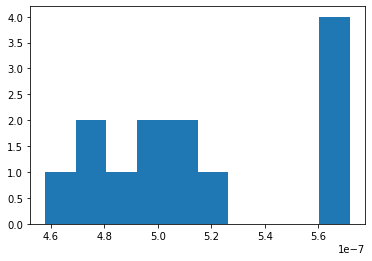

In [8]:
import matplotlib.pyplot as plt
plt.hist(opt_results['objectives'].numpy().flatten())